## SVM implementation through CRNs
The notebook is meant to contain the code implementation of Linear Hard Margin SVMs through CRNs. We shall be utilising various properties like dual-rail encoding, oscillator molecules, approximate majority .etc. to accomplish this.

### Sections 
- Implementation of Linear Hard Margin SVMs
- Making modules to do Linear Hard Margin SVMs

### Implemetation of Linear Hard Margin SVMs

The theory behind SVMs:

[Link to resource](https://www.python-engineer.com/courses/mlfromscratch/07_svm/)

[Another link](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

Cost of just prediction

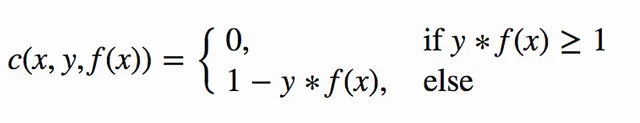

Total cost function

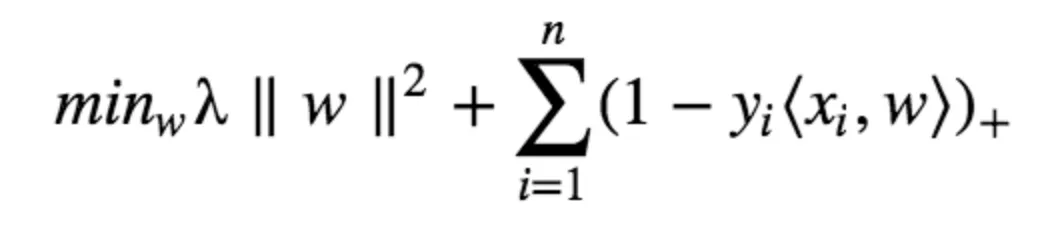


Splitting the cost function in 2 parts. First part derivative is same for both and as follows as for second part. For correctly classified, its 0, otherwise other one.

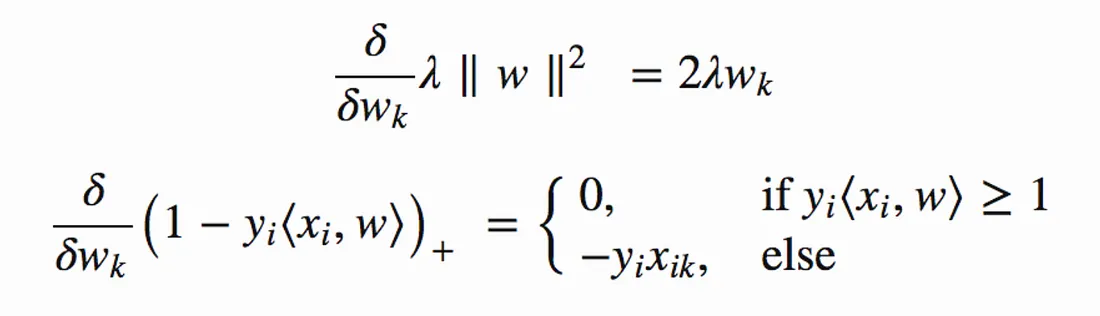


Update for Correctly classified. No update needed for bias in correctly classified (as derivative wrt to b is 0)

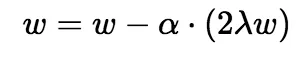

Update for Incorrectly classified.

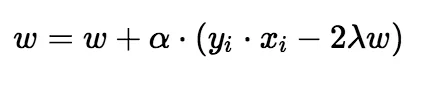

Bias not included in above. If included i.e. wX+b , 
- in correctly classified no update as derivative wrt to b is 0
- in incorrectly classified is simply derivative as belows

Normal Python Implementation

In [1]:
# import numpy as np

# class SVM():
#     def __init__(self, lr = 0.001, epochs = 10000):
#         self.w = None
#         self.b = None
#         self.lr = lr
#         self.epochs = epochs

#     def train(self, X, y):
#         n_samples, n_features = X.shape
#         self.w = np.zeros(n_features)
#         self.b = 0

#         for _ in range(self.epochs):
#             for i, x in enumerate(X):
#                 if y[i] * (np.dot(x, self.w) - self.b) >= 1:
#                     self.w -= self.lr * (2 * 1/self.epochs * self.w)
#                 else:
#                     self.w -= self.lr * (2 * 1/self.epochs * self.w - np.dot(x, y[i]))
#                     self.b -= self.lr * y[i]
    
#     def show(self):
#         print(self.w, self.b)
    
#     def loss(self, X, y):
#         return 1/2 * np.dot(self.w, self.w) + 1/self.epochs * np.sum(np.maximum(0, 1 - y * (np.dot(X, self.w) - self.b)))

#     def predict(self, X):
#         return np.sign(np.dot(X, self.w) - self.b)

In [2]:
import numpy as np
# case = 1
# X = np.array([ [1, 8], [3, 8], [5, 1], [-6, -1], [7, 3], [8, 7]])
# y = np.array([-1, 1, 1, -1, 1, -1])

# case = 2
# X = np.array([[1, 7], [2, 8], [3, 8], [5, 1], [6, -1], [7, 3]])
# y = np.array([1, 1, 1, -1, -1, -1])

# case = 3
# data = [
#  [-0.62813787 , 2.17555329],
#  [-2.30928855 , 2.6731255 ],
#  [-2.25663018 , 1.63217428],
#  [ 3.27373362 ,-2.29195267],
#  [-0.65517605 ,-1.65448206],
#  [ 1.60448355 ,-2.28913686]
# ]
# X = np.array(data)
# y = np.array([ 1. , 1.,  1., -1., -1. ,-1.])

case = 4
X = np.array([
    [27.65, 15.65],
    [23.1 , 14.6 ],
    [23.5 , 15.2 ],
    [24.05, 14.9 ],
    [24.5 , 14.7 ],
    [14.15, 17.35],
    [14.3 , 16.8 ],
    [14.3 , 15.75],
    [14.75, 15.1 ],
    [15.35, 15.5 ]
])

y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

# X = np.array([
#     [15.35, 15.5 ]
# ])

# y = np.array([ -1])


In [3]:
# hyper parameters
epochs = 500
lr = 0.0001 # lr * epochs >=1
time_step = 100
ct = 1/500

### Making modules to do Linear Hard Margin SVMs

In [4]:
def dual_rail_encoding_arr(x):
    x_p = []
    x_n = []
    for i in x:
        p = []
        n = []

        for j in i:
            if j > 0:
                p.append(j)
                n.append(0)
            else:
                p.append(0)
                n.append(-j)
        x_p.append(p)
        x_n.append(n)
    return x_p, x_n

def dual_rail_encoding_num(x):
    x_p = []
    x_n = []

    for i in x:
        if i > 0:
            x_p.append(i)
            x_n.append(0)
        else:
            x_p.append(0)
            x_n.append(-i)
    return x_p, x_n


In [5]:
X_p, X_n = dual_rail_encoding_arr(X)
Y_p, Y_n = dual_rail_encoding_num(y)
print(X_p, X_n)
print(Y_p, Y_n)

[[27.65, 15.65], [23.1, 14.6], [23.5, 15.2], [24.05, 14.9], [24.5, 14.7], [14.15, 17.35], [14.3, 16.8], [14.3, 15.75], [14.75, 15.1], [15.35, 15.5]] [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [6]:
from scipy.integrate import odeint

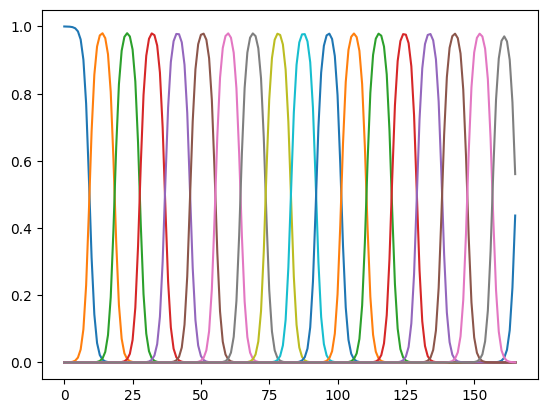

In [7]:
def osciallation(num_species, time_Duration = 165):
    O_t = np.zeros(num_species)
    O_t[0] = 1
    t = np.linspace(0, time_Duration, time_Duration+1)
    dope = 10 ** (-4)
    d_o_T = np.ones(num_species) * dope

    def doped_model(O_t, t,  d_o_T):
        dO_t = np.zeros(num_species)
        dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
        for i in range(1, num_species-1):
            dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
        dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        return dO_t
    
    O = odeint(doped_model, O_t, t, args=(d_o_T,))
    return O


sol = osciallation(18)

# plotting the solution 
import matplotlib.pyplot as plt
plt.plot(sol)
# plt.legend([f"O{i}" for i in range(1, 19)])
plt.show()

In [8]:
# laoding function
def load_f(y,t,a):
    c = y[0]
    dc_dt = -c + a
    return [ dc_dt]

def load_wrapper(a, c, time_start):
    y0 = [c]
    # print(a)
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(load_f, y0, t, args=(a,))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]


In [9]:
# multiplication function
def product_f(y,t,a,b):
    c = y[0]
    dc_dt = -c + a*b
    return [ dc_dt]

def product_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(product_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]

In [10]:
# sum
def sum_f(y,t,a,b):
    c = y[0]
    dc_dt = -c + a + b
    return [ dc_dt]

def sum_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(sum_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]

In [11]:
# division
def div_f(y,t,a,b):
    c = y[0]
    dc_dt = a - b*c
    return [ dc_dt]

def div_wrapper(a,b,c, time_start):
    y0 = [c]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(div_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    c_f = sol[:, 0]
    return c_f[-1]


In [12]:
# comparison
def comparison_f(y, t, a, b):
    dydt = []
    bgta = y[0]
    blta = y[1]

    temp = b*blta - bgta*a
    dydt.append(temp)

    temp = bgta*a - b*blta
    dydt.append(temp)

    return dydt

def Approx_majority (y, t):
    kgtq = y[0]
    kltq = y[1]
    b_help = y[2]

    dydt = []
    
    temp =  - kgtq*kltq + kgtq *b_help
    dydt.append(temp)

    temp = kltq*b_help - kgtq*kltq
    dydt.append(temp)

    temp = 2* kgtq*kltq - kgtq*b_help - kltq*b_help 
    dydt.append(temp)

    return dydt



def comparison_wrapper(a,b,c, time_start):

    bgta = c
    blta = c

    y0 = [bgta, blta]
    t = np.linspace(time_start, time_start+time_step, time_step+1)
    
    sol = odeint(comparison_f, y0, t, args=(a,b))

    # a_f = sol[:, 0]
    # b_f = sol[:, 1]
    bgta = sol[:, 0][-1]
    blta = sol[:, 1][-1]
    help_b = 0

    # print(bgta, blta, help_b)



    y_0_1 = [bgta, blta, help_b]

    t = np.linspace(time_start + time_step , time_start + 2*time_step, time_step+1)

    sol = odeint(Approx_majority, y_0_1, t)
    bgta = sol[:,0][-1]
    blta = sol[:,1][-1]
    help_b = sol[:,2][-1]

    return bgta


In [13]:
# print(load_wrapper(8,0,0)) # stores a in c (c = a)
# print(product_wrapper(8,2,1,0)) # multiplies a and b and stores it in c (c = a*b)
# print(sum_wrapper(8,2,1,0)) # adds a and b and stores it in c (c = a+b)
# print(div_wrapper(8,2,1,0)) # divides a by b and stores it in c (c = a/b)
# print(comparison_wrapper(2,4,0.5,0))# compares a and b. c is initially 0.5. if a> b, then c = 0 , if b >a, then c =1 , otherwise c=0.5


In [14]:
# import numpy as np
# from sklearn import svm


# # Create and train SVM with a linear kernel
# clf = svm.SVC(kernel='linear')

# # Fit the model
# clf.fit(X, y)

# # Extract the optimal weights and bias
# weights = clf.coef_[0]
# bias = clf.intercept_[0]

# print(f"Weights: {weights}")
# print(f"Bias: {bias}")

# # plotting the decision boundary
# import matplotlib.pyplot as plt

# def plot_decision_boundary(X, y, weights, bias):
#     # Determine the slope and bias of the decision boundary
#     slope = -weights[0] / weights[1]
#     intercept = -bias / weights[1]

#     # Plot the data points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

#     # Plot the decision boundary
#     x = np.linspace(-10, 10, 100)
#     y = slope * x + intercept
#     plt.plot(x, y, '-r', label='Decision Boundary')
#     plt.ylim(-10, 10)
#     plt.legend()
#     plt.show()

# plot_decision_boundary(X, y, weights, bias)


In [15]:
# weight species W_1 , W_2 (set by looking at the num of features)
# bias species B

w_0_p = 1
w_0_n = 0
w_1_p = 1
w_1_n = 0
b_p = 0
b_n = 0
P_p = 0
P_n = 0
Q_p = 0
Q_n =0

# intermediates
w_0_p_x_p_0 = 0
w_1_p_x_p_1 = 0
w_0_n_x_n_0 = 0
w_1_n_x_n_1 = 0
w_0_p_x_n_0 = 0
w_0_n_x_p_0 = 0
w_1_p_x_n_1 = 0
w_1_n_x_p_1 = 0

# storing the values of intermediates
w_0_p_x_p_0_arr = [w_0_p_x_p_0]
w_1_p_x_p_1_arr = [w_1_p_x_p_1]
w_0_n_x_n_0_arr = [w_0_n_x_n_0]
w_1_n_x_n_1_arr = [w_1_n_x_n_1]
w_0_p_x_n_0_arr = [w_0_p_x_n_0]
w_0_n_x_p_0_arr = [w_0_n_x_p_0]
w_1_p_x_n_1_arr = [w_1_p_x_n_1]
w_1_n_x_p_1_arr = [w_1_n_x_p_1]



w_0_p_arr = [w_0_p]
w_0_n_arr = [w_0_n]
w_1_p_arr = [w_1_p]
w_1_n_arr = [w_1_n]
b_p_arr = [b_p]
b_n_arr = [b_n]
P_p_arr = [P_p]
P_n_arr = [P_n]
Q_p_arr = [Q_p]
Q_n_arr = [Q_n]
loss_arr = [0]



time_index =0 

for t in range(epochs):
    time_start = t*time_step

    for i, x in enumerate(X):
        # defining species here as complexes
        x_p = X_p[i]
        x_p_0 = x_p[0]
        x_p_1 = x_p[1]

        x_n = X_n[i]
        x_n_0 = x_n[0]
        x_n_1 = x_n[1]

        y_p = Y_p[i]
        y_n = Y_n[i]

        x_p_0_y_p = product_wrapper(x_p_0, y_p, 0, time_start)
        x_p_1_y_p = product_wrapper(x_p_1, y_p, 0, time_start)
        x_n_0_y_n = product_wrapper(x_n_0, y_n, 0, time_start)
        x_n_1_y_n = product_wrapper(x_n_1, y_n, 0, time_start)
        x_p_0_y_n = product_wrapper(x_p_0, y_n, 0, time_start)
        x_p_1_y_n = product_wrapper(x_p_1, y_n, 0, time_start)
        x_n_0_y_p = product_wrapper(x_n_0, y_p, 0, time_start)
        x_n_1_y_p = product_wrapper(x_n_1, y_p, 0, time_start)

        # P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
        w_0_p_x_p_0 = product_wrapper(w_0_p, x_p_0, w_0_p_x_p_0, time_start)
        w_1_p_x_p_1 = product_wrapper(w_1_p, x_p_1, w_1_p_x_p_1, time_start)
        w_0_n_x_n_0 = product_wrapper(w_0_n, x_n_0, w_0_n_x_n_0, time_start)
        w_1_n_x_n_1 = product_wrapper(w_1_n, x_n_1, w_1_n_x_n_1, time_start)
        P_p = sum_wrapper(w_0_p_x_p_0, w_1_p_x_p_1, P_p, time_start)
        P_p = sum_wrapper(P_p, w_0_n_x_n_0, P_p, time_start)
        P_p = sum_wrapper(P_p, w_1_n_x_n_1, P_p, time_start)
        P_p = sum_wrapper(P_p, b_n, P_p, time_start)
        
        # P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p
        w_0_p_x_n_0 = product_wrapper(w_0_p, x_n_0, w_0_p_x_n_0, time_start)
        w_0_n_x_p_0 = product_wrapper(w_0_n, x_p_0, w_0_n_x_p_0, time_start)
        w_1_p_x_n_1 = product_wrapper(w_1_p, x_n_1, w_1_p_x_n_1, time_start)
        w_1_n_x_p_1 = product_wrapper(w_1_n, x_p_1, w_1_n_x_p_1, time_start)
        P_n = sum_wrapper(w_0_p_x_n_0, w_1_p_x_n_1, P_n, time_start)
        P_n = sum_wrapper(P_n, w_0_n_x_p_0, P_n, time_start)
        P_n = sum_wrapper(P_n, w_1_n_x_p_1, P_n, time_start)
        P_n = sum_wrapper(P_n, b_p, P_n, time_start)
        
        temp_1 = 1
        temp_1 = product_wrapper(y_p, P_p, temp_1, time_start)

        temp_2 = 1
        temp_2 = product_wrapper(y_n, P_n, temp_2, time_start)

        temp_3 = 1
        temp_3 = product_wrapper(y_p, P_n, temp_3, time_start)

        temp_4 = 1
        temp_4 = product_wrapper(y_n, P_p, temp_4, time_start)

        # Q_p = Y_p[i]* P_p + Y_n[i] * P_n
        Q_p = sum_wrapper(temp_1, temp_2, Q_p, time_start)
        # Q_n = Y_p[i]* P_n + Y_n[i] * P_p
        Q_n = sum_wrapper(temp_3, temp_4, Q_n, time_start)

        Q_n_t = 1
        Q_n_t = sum_wrapper(Q_n, 1, Q_n_t, time_start)

        const = lr *ct
        const_t = 0

        bgta = comparison_wrapper(Q_p, Q_n_t,0.5,time_start)

        # w_0_p = w_0_p + lr * (2 * ct * w_0_n) + lr * (x_p[0] * Y_p[i] + x_n[0] * Y_n[i]) * bgta
        const_1 = product_wrapper(w_0_n, const, const_t, time_start)
        w_0_p = sum_wrapper(w_0_p, const_1, w_0_p, time_start)
        const_2 = sum_wrapper(x_p_0_y_p, x_n_0_y_n, const_t, time_start)
        const_2 =product_wrapper(const_2, lr, const_t, time_start)
        const_2 = product_wrapper(const_2, bgta, const_2, time_start)
        w_0_p = sum_wrapper(w_0_p, const_2, w_0_p, time_start)

        # w_1_p = w_1_p + lr * (2 * ct * w_1_n) + lr * (x_p[1] * Y_p[i] + x_n[1] * Y_n[i]) * bgta
        const_3 = product_wrapper(w_1_n, const, const_t, time_start)
        w_1_p = sum_wrapper(w_1_p, const_3, w_1_p, time_start)  
        const_4 = sum_wrapper(x_p_1_y_p, x_n_1_y_n, const_t, time_start)
        const_4 =product_wrapper(const_4, lr, const_t, time_start)
        const_4 = product_wrapper(const_4, bgta, const_4, time_start)
        w_1_p = sum_wrapper(w_1_p, const_4, w_1_p, time_start)

        # w_0_n = w_0_n + lr * (2 * ct * w_0_p) + lr * (x_n[0] * Y_p[i] + x_p[0] * Y_n[i]) * bgta
        const_5 = product_wrapper(w_0_p, const, const_t, time_start)
        w_0_n = sum_wrapper(w_0_n, const_5, w_0_n, time_start)
        const_6 = sum_wrapper(x_n_0_y_p, x_p_0_y_n, const_t, time_start)
        const_6 =product_wrapper(const_6, lr, const_t, time_start)
        const_6 = product_wrapper(const_6, bgta, const_6, time_start)
        w_0_n = sum_wrapper(w_0_n, const_6, w_0_n, time_start)

        # w_1_n = w_1_n + lr * (2 * ct * w_1_p) + lr * (x_n[1] * Y_p[i] + x_p[1] * Y_n[i]) * bgta
        const_7 = product_wrapper(w_1_p, const, const_t, time_start)
        w_1_n = sum_wrapper(w_1_n, const_7, w_1_n, time_start)
        const_8 = sum_wrapper(x_n_1_y_p, x_p_1_y_n, const_t, time_start)
        const_8 =product_wrapper(const_8, lr, const_t, time_start)
        const_8 = product_wrapper(const_8, bgta, const_8, time_start)
        w_1_n = sum_wrapper(w_1_n, const_8, w_1_n, time_start)

        # b_p = b_p + lr * Y_n[i] * bgta
        const_9 = product_wrapper(y_p, lr, const_t, time_start)
        const_9 = product_wrapper(const_9, bgta, const_9, time_start)
        b_p = sum_wrapper(b_p, const_9, b_p, time_start)

        # b_n = b_n + lr * Y_p[i] * bgta
        const_10 = product_wrapper(y_n, lr, const_t, time_start)
        const_10 = product_wrapper(const_10, bgta, const_10, time_start)
        b_n = sum_wrapper(b_n, const_10, b_n, time_start)
            
        
        w_0_p_arr.append(w_0_p)
        w_0_n_arr.append(w_0_n)
        w_1_p_arr.append(w_1_p)
        w_1_n_arr.append(w_1_n)
        b_p_arr.append(b_p)
        b_n_arr.append(b_n)
        P_p_arr.append(P_p)
        P_n_arr.append(P_n)
        Q_p_arr.append(Q_p)
        Q_n_arr.append(Q_n)

        w_0_p_x_p_0_arr.append(w_0_p_x_p_0)
        w_1_p_x_p_1_arr.append(w_1_p_x_p_1)
        w_0_n_x_n_0_arr.append(w_0_n_x_n_0)
        w_1_n_x_n_1_arr.append(w_1_n_x_n_1)
        w_0_p_x_n_0_arr.append(w_0_p_x_n_0)
        w_0_n_x_p_0_arr.append(w_0_n_x_p_0)
        w_1_p_x_n_1_arr.append(w_1_p_x_n_1)
        w_1_n_x_p_1_arr.append(w_1_n_x_p_1)

    # finding the loss on y

    # predicting

    y_result = []
    for i, x in enumerate(X):
        x_p = X_p[i]
        x_n = X_n[i]
        y_p = Y_p[i]
        y_n = Y_n[i]

        P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
        P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p

    # Q_p = Y_p[i]* P_p + Y_n[i] * P_n
    # Q_n = Y_p[i]* P_n + Y_n[i] * P_p
    
        if P_p - P_n >=0:
            y_result.append(1)
        else:
            y_result.append(-1)
    loss = 0
    for i in range(len(y)):
        if y[i] != y_result[i]:
            loss += 1
    loss_arr.append(loss)


    print(t, end='\r')


        

In [16]:
# # plot the arrays
# import matplotlib.pyplot as plt
# # plt.plot(w_0_p_arr, label = 'w_0_p')
# # plt.plot(w_0_n_arr, label = 'w_0_n')
# # plt.plot(w_1_p_arr, label = 'w_1_p')
# # plt.plot(w_1_n_arr, label = 'w_1_n')
# # plt.plot(loss_arr, label = 'loss')
# # plt.plot(b_p_arr, label = 'b_p')
# # plt.plot(b_n_arr, label = 'b_n')
# plt.plot(P_p_arr[260:280], label = 'P_p')
# plt.plot(P_n_arr[260:280], label = 'P_n')
# # plt.plot(Q_p_arr, label = 'Q_p')
# # plt.plot(Q_n_arr, label = 'Q_n')
# plt.legend()
# plt.show()

In [17]:
w_0 = w_0_p_arr[-1] - w_0_n_arr[-1]
w_1 = w_1_p_arr[-1] - w_1_n_arr[-1]
b = b_p_arr[-1] - b_n_arr[-1]
print(w_0, w_1, b)

0.23556124177012716 -0.30316834162349404 -0.07920004302325243


In [18]:
def net_calc(list1, list2):
    result = [a - b for a, b in zip(list1, list2)]

    return result

In [19]:
# p_net = net_calc(P_p_arr, P_n_arr)
# q_net = net_calc(Q_p_arr, Q_n_arr)

# plt.plot(p_net, label = 'P_net')
# plt.plot(q_net, label = 'Q_net')
# # plt.plot(P_p_arr[260:280], label = 'P_p')
# # plt.plot(P_n_arr[260:280], label = 'P_n')
# plt.legend()
# plt.show()

# for i in range(len(P_p_arr)):
#     print(p_net[i], q_net[i])

In [20]:
# w1_net = net_calc(w_0_p_arr, w_0_n_arr)
# w2_net = net_calc(w_1_p_arr, w_1_n_arr)
# print(len(w1_net), len(w2_net))
# for i in range(len(w1_net)):
#     print(w1_net[i], w2_net[i])

In [21]:
w1_net = net_calc(w_0_p_arr, w_0_n_arr)
w2_net = net_calc(w_1_p_arr, w_1_n_arr)
b_net = net_calc(b_p_arr, b_n_arr)

# remove the first element
w1_net = w1_net[1:]
w2_net = w2_net[1:]
b_net = b_net[1:]  
# take every 10th element
w1_net = w1_net[::10]
w2_net = w2_net[::10]
b_net = b_net[::10]

print(w1_net[-1], w2_net[-1], b_net[-1])
print(len(w1_net), len(w2_net), len(b_net))

0.23556166576880333 -0.3031688873348155 -0.0792000430284219
500 500 500


In [22]:
# write values to a csv file
import csv

with open('svm_weights.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['w1', 'w2', 'b'])
    for i in range(len(w1_net)):
        writer.writerow([w1_net[i], w2_net[i], b_net[i]])

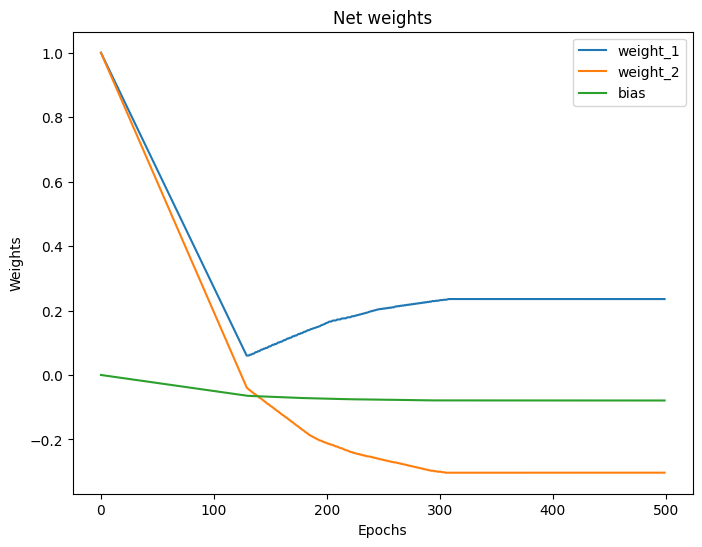

In [23]:
import matplotlib.pyplot as plt

# Define colorblind-friendly colors
color_weight1 = '#377eb8'  # Blue
color_weight2 = '#e41a1c'  # Red

# Plotting the net weights and bias
plt.figure(figsize=(8, 6))
plt.title('Net weights')
plt.plot(w1_net, label='weight_1')
plt.plot(w2_net, label='weight_2')
plt.plot(b_net, label='bias')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.legend()
plt.savefig('net_weights.svg', format='svg')
plt.show()

# save as vector graphics


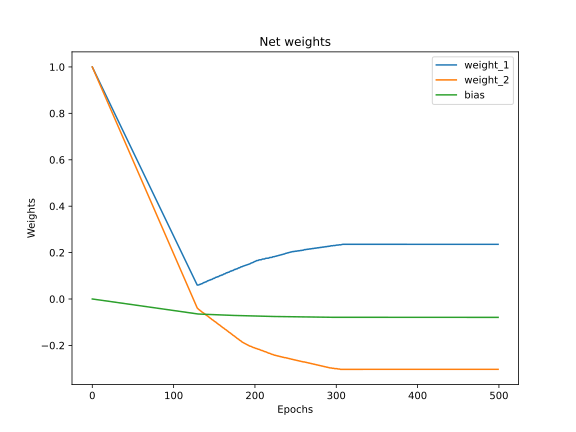

In [24]:
# load the svg file
from IPython.display import SVG
SVG('net_weights.svg')

In [25]:
# # writing w1 and w2  array to a file
# import csv
# with open('w1_w2.csv', mode='w') as file:
#     writer = csv.writer(file)
#     writer.writerow('w1,w2'.split(','))
#     for i in range(len(w1_net)):
#         writer.writerow([w1_net[i], w2_net[i]])

In [26]:
# # open the file and read the data
# w1_kaggle = []
# w2_kaggle = []
# with open('w1_w2_kaggle_old.csv', mode='r') as file:
#     reader = csv.reader(file)
#     for row in reader:
#         w1_kaggle.append(row[0])
#         w2_kaggle.append(row[1])
# w1_kaggle = w1_kaggle[1:]
# w2_kaggle = w2_kaggle[1:]

# w1_kaggle = [float(i) for i in w1_kaggle]
# w2_kaggle = [float(i) for i in w2_kaggle]


# w1_kaggle_osc = []
# w2_kaggle_osc = []
# with open('w1_w2_kaggle.csv', mode='r') as file:
#     reader = csv.reader(file)
#     for row in reader:
#         w1_kaggle_osc.append(row[0])
#         w2_kaggle_osc.append(row[1])

# w1_kaggle_osc = w1_kaggle_osc[1:]
# w2_kaggle_osc = w2_kaggle_osc[1:]

# w1_kaggle_osc = [float(i) for i in w1_kaggle_osc]
# w2_kaggle_osc = [float(i) for i in w2_kaggle_osc]

In [27]:
# w1_diff_old = net_calc(w1_kaggle, w1_net)
# w2_diff_old = net_calc(w2_kaggle, w2_net)

# w1_diff = net_calc(w1_kaggle_osc, w1_net)
# w2_diff = net_calc(w2_kaggle_osc, w2_net)



# # plotting the difference


# plt.plot(w1_diff[0:100], label = 'w1_diff_osc')
# # plt.plot(w2_diff, label = 'w2_diff_osc')
# # plt.plot(w1_diff_old, label = 'w1_diff_old')
# # plt.plot(w2_diff_old, label = 'w2_diff_old')
# # 
# plt.legend()
# plt.show()

In [28]:
# epoch_t = -1
# print(w1_net[epoch_t], w2_net[epoch_t], b_net[epoch_t])

In [29]:
# # predicting

# test_result = []
# for i, x in enumerate(X):
#     x_p = X_p[i]
#     x_n = X_n[i]
#     y_p = Y_p[i]
#     y_n = Y_n[i]
    

#     P_p = w_0_p * x_p[0] + w_1_p * x_p[1] + w_0_n * x_n[0] + w_1_n * x_n[1] + b_n
#     P_n = w_0_p * x_n[0] + w_1_p * x_n[1] + w_0_n * x_p[0] + w_1_n * x_p[1] + b_p
#     print(P_p, P_n)

#     Q_p = Y_p[i]* P_p + Y_n[i] * P_n
#     Q_n = Y_p[i]* P_n + Y_n[i] * P_p
#     print(Q_p, Q_n)

#     if Q_p - Q_n >=1:
#         test_result.append(0)
#     else:
#         test_result.append(1)
    
# print(test_result)
  


In [30]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # Generate mock data (replace this with your actual data)
# w1 = net_calc(w_0_p_arr, w_0_n_arr)
# w2 = net_calc(w_1_p_arr, w_1_n_arr)
# weights_history =  [(w1[i], w2[i]) for i in range(len(w1))]
# bias_history = net_calc(b_p_arr, b_n_arr)

# num_frames = len(weights_history)


# # Set up the plot
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xlim(-30, 30)
# ax.set_ylim(-30, 30)

# points = X
# labels = y


# # Initialize scatter plot for points
# scatter = ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='coolwarm')

# # Initialize line for hyperplane
# line, = ax.plot([], [], 'g-', lw=2)

# # Text for displaying current frame
# frame_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, va='top')

# def init():
#     return scatter, line, frame_text

# def update(frame):
#     # Update hyperplane
#     print(frame, end='\r')
#     w1, w2 = weights_history[frame]
#     b = bias_history[frame]
    
#     x = np.array([-30, 30])
#     y = (-w1 * x - b) / w2
    
#     line.set_data(x, y)
    
#     # Update frame text
#     frame_text.set_text(f'Frame: {frame}')
    
#     return scatter, line, frame_text

# # Create animation
# anim = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, interval=100)

# plt.title("Hyperplane and Training Points Animation Case: "+ str(case) + " lr =" + str(lr) + " epochs = " + str(epochs))
# plt.show()

# # Uncomment the following line to save the animation as a gif
# title = "hyperplane_animation svm Case: " + str(case)  + "lr =" + str(lr) + " epochs = " + str(epochs) + ".mp4"
# anim.save(title, writer='ffmpeg', fps=30)

In [31]:
# issues
# time_Steps
# oscillations
# mutability
# use load wrapper, whenever species

In [32]:
# def osciallation(num_species, time_Duration = 1000):
#     O_t = np.zeros(num_species)
#     O_t[0] = 1
#     t = np.linspace(0, time_Duration, time_Duration+1)
#     dope = 10 ** (-5)
#     d_o_T = np.ones(num_species) * dope

#     y = []
#     y.extend(O_t)
#     y.extend(d_o_T)

#     def doped_model(y, t,  d_o_T):
#         O_t = y[:num_species]
#         d_o_T = y[num_species:]

#         dO_t = np.zeros(num_species)
#         dd_o_t = np.zeros(num_species)


#         dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
#         for i in range(1, num_species-1):
#             dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
#         dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        

#         dd_o_t[0] = -d_o_T[0]*O_t[num_species-1]
#         for i in range(1, num_species-1):
#             dd_o_t[i] = -d_o_T[i]*O_t[i-1]
#         dd_o_t[num_species-1] = -d_o_T[num_species-1]*O_t[num_species-2]

#         dydt = []
#         dydt.extend(dO_t)
#         dydt.extend(dd_o_t)

#         return dydt
    
#     O = odeint(doped_model, y, t, args=(d_o_T,))
#     return O


# sol = osciallation(3)

# # plotting the solution 
# import matplotlib.pyplot as plt
# plt.plot(sol)
# plt.legend(['O1', 'O2', 'O3'])
# plt.show()

In [33]:
# # custom function

# y_0 = [1,2,0,4,5]


# def custom_function_wrapper(y_0):
#     y = y_0

#     o1 = 1
#     o2 = 0
#     o3 = 0
#     o4 = 0
#     y.append(o1)
#     y.append(o2)
#     y.append(o3)
#     y.append(o4)

#     dope = 10 ** (-5)
#     d_o1 = dope
#     d_o2 = dope
#     d_o3 = dope
#     d_o4 = dope

#     y.append(d_o1)
#     y.append(d_o2)
#     y.append(d_o3)
#     y.append(d_o4)
    

#     t = np.linspace(0, 100, 101)
#     def custom_f(y,t):
#         dydt = []
#         dadt = 0
#         dbdt = 0
#         dcdt = y[0]*y[5] + y[1]*y[5] - y[2]*y[5]
#         dddt = 0
#         dedt = y[2]*y[3]*y[8] - y[4]*y[8]
#         dydt = [dadt, dbdt, dcdt, dddt, dedt]

#         # adding the oscillation part
#         num_species = 4
#         O_t = y[-2*num_species : -num_species]
#         d_o_T = y[-num_species:]

#         dO_t = np.zeros(num_species)
#         dd_o_t = np.zeros(num_species)


#         dO_t[0] = -O_t[0]*O_t[1] + O_t[num_species-1]*O_t[0] + d_o_T[0]* O_t[num_species-1] - d_o_T[1]*O_t[0]
#         for i in range(1, num_species-1):
#             dO_t[i] = O_t[i-1]*O_t[i] - O_t[i]*O_t[i+1] + d_o_T[i]*O_t[i-1] - d_o_T[i+1]*O_t[i]
#         dO_t[num_species-1] = O_t[num_species-2]*O_t[num_species-1] - O_t[num_species-1]*O_t[0] + d_o_T[num_species-1]*O_t[num_species-2] - d_o_T[0]*O_t[num_species-1]
        

#         dd_o_t[0] = -d_o_T[0]*O_t[num_species-1]
#         for i in range(1, num_species-1):
#             dd_o_t[i] = -d_o_T[i]*O_t[i-1]
#         dd_o_t[num_species-1] = -d_o_T[num_species-1]*O_t[num_species-2]

#         dydt.extend(dO_t)
#         dydt.extend(dd_o_t) 

#         return dydt

#     sol = odeint(custom_f, y, t)
#     return sol

# # for i in range(100):
# #     sol = custom_function_wrapper(y_0)
# #     y_0 = sol[-1].tolist()

# # print(y_0)

# # print(sol)

# plt.plot(sol)
# plt.legend(['A' , 'B', 'C' , 'D' ,'E'])
# plt.show()

In [34]:
# a = sol[:, 0]
# b = sol[:, 1]
# c = sol[:, 2]
# d = sol[:, 3]
# e = sol[:, 4]

# print(len(a))

# for i in range(len(a)):
#     print(a[i], b[i], c[i], d[i], e[i])

In [35]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_svm_decision_boundaries(X, y, weights1, bias1, weights2, bias2, labels=("Boundary 1", "Boundary 2")):
#     """
#     Plots two SVM decision boundaries on the same plot with appropriate labels.

#     Parameters:
#         X (numpy.ndarray): 2D array of shape (n_samples, 2) with feature values.
#         y (numpy.ndarray): 1D array of shape (n_samples,) with class labels (0 or 1).
#         weights1 (numpy.ndarray): 1D array of shape (2,) for the first boundary.
#         bias1 (float): Bias term for the first decision boundary.
#         weights2 (numpy.ndarray): 1D array of shape (2,) for the second boundary.
#         bias2 (float): Bias term for the second decision boundary.
#         labels (tuple): Labels for the decision boundaries.
#     """
#     sns.set(style="whitegrid")

#     # Create a mesh grid
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

#     # Compute decision boundary for first model
#     Z1 = weights1[0] * xx + weights1[1] * yy + bias1
#     Z1 = Z1.reshape(xx.shape)

#     # Compute decision boundary for second model
#     Z2 = weights2[0] * xx + weights2[1] * yy + bias2
#     Z2 = Z2.reshape(xx.shape)

#     # Plot the decision boundaries
#     plt.figure(figsize=(8, 6))
#     plt.contour(xx, yy, Z1, levels=[0], colors="black", linewidths=2, label=labels[0])
#     plt.contour(xx, yy, Z2, levels=[0], colors="blue", linewidths=2, linestyles="dashed", label=labels[1])

#     # Plot data points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=70)

#     # Add legend for decision boundaries
#     plt.plot([], [], color="black", linewidth=2, label=labels[0])  # Solid line label
#     plt.plot([], [], color="blue", linewidth=2, linestyle="dashed", label=labels[1])  # Dashed line label

#     plt.xlabel("Feature 1")
#     plt.ylabel("Feature 2")
#     plt.title("Comparison of Two SVM Decision Boundaries")
#     plt.legend()
#     plt.show()

# # Example usage with synthetic data

# from sklearn.datasets import make_classification
# from sklearn.svm import SVC

# # Generate synthetic dataset
# X, y = make_classification(n_samples=12, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)

#     # Train first SVM model
# svm1 = SVC(kernel="linear", C=1.0)
# svm1.fit(X, y)
# weights1 = svm1.coef_[0]
# bias1 = svm1.intercept_[0]

#     # Train second SVM model with different parameters
# svm2 = SVC(kernel="linear", C=0.1)  # Different C value
# svm2.fit(X, y)
# weights2 = svm2.coef_[0]
# bias2 = svm2.intercept_[0]

#     # Plot decision boundaries
# plot_svm_decision_boundaries(X, y, weights1, bias1, weights2, bias2, labels=("C=1.0", "C=0.1"))


### Assignment Module

In [36]:
X = np.array([
    [27.65, 15.65],
    [23.1 , 14.6 ],
    [23.5 , 15.2 ],
    [24.05, 14.9 ],
    [24.5 , 14.7 ],
    [14.15, 17.35],
    [14.3 , 16.8 ],
    [14.3 , 15.75],
    [14.75, 15.1 ],
    [15.35, 15.5 ]
])

y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])



In [37]:
def p_f(x):
    if (x>= 0):
        return x
    else:
        return 0

def n_f(x):
    if (x<0):
        return -x
    else:
        return 0

In [38]:
# assignment module species set
# doing a batch size of 2 , and input is 10 species

# naming convention, x_i_j_s 
# i = super script
# j = subscript
# s = sign

species_concentrations_am = {

# input species full
    # positive
    'x_1_1_p': [p_f(X[0][0])], # superscript is index in overall inputs, subscript is index of dimension in input
    'x_1_2_p': [p_f(X[0][1])],
    'x_2_1_p': [p_f(X[1][0])],
    'x_2_2_p': [p_f(X[1][1])],
    'x_3_1_p': [p_f(X[2][0])],
    'x_3_2_p': [p_f(X[2][1])],
    'x_4_1_p': [p_f(X[3][0])],
    'x_4_2_p': [p_f(X[3][1])],
    'x_5_1_p': [p_f(X[4][0])],
    'x_5_2_p': [p_f(X[4][1])],
    'x_6_1_p': [p_f(X[5][0])],
    'x_6_2_p': [p_f(X[5][1])],
    'x_7_1_p': [p_f(X[6][0])],
    'x_7_2_p': [p_f(X[6][1])],  
    'x_8_1_p': [p_f(X[7][0])],
    'x_8_2_p': [p_f(X[7][1])],
    'x_9_1_p': [p_f(X[8][0])],
    'x_9_2_p': [p_f(X[8][1])],
    'x_10_1_p': [p_f(X[9][0])],
    'x_10_2_p': [p_f(X[9][1])],
    'y_1_p': [p_f(y[0])], # y_i_p is the label of the ith input
    'y_2_p': [p_f(y[1])],
    'y_3_p': [p_f(y[2])],   
    'y_4_p': [p_f(y[3])],
    'y_5_p': [p_f(y[4])],
    'y_6_p': [p_f(y[5])],
    'y_7_p': [p_f(y[6])],
    'y_8_p': [p_f(y[7])],
    'y_9_p': [p_f(y[8])],
    'y_10_p': [p_f(y[9])],

    # negative
    'x_1_1_n': [n_f(X[0][0])],
    'x_1_2_n': [n_f(X[0][1])],
    'x_2_1_n': [n_f(X[1][0])],
    'x_2_2_n': [n_f(X[1][1])],
    'x_3_1_n': [n_f(X[2][0])],
    'x_3_2_n': [n_f(X[2][1])],
    'x_4_1_n': [n_f(X[3][0])],
    'x_4_2_n': [n_f(X[3][1])],  
    'x_5_1_n': [n_f(X[4][0])],
    'x_5_2_n': [n_f(X[4][1])],
    'x_6_1_n': [n_f(X[5][0])],
    'x_6_2_n': [n_f(X[5][1])],
    'x_7_1_n': [n_f(X[6][0])],
    'x_7_2_n': [n_f(X[6][1])],
    'x_8_1_n': [n_f(X[7][0])],
    'x_8_2_n': [n_f(X[7][1])],
    'x_9_1_n': [n_f(X[8][0])],
    'x_9_2_n': [n_f(X[8][1])],
    'x_10_1_n': [n_f(X[9][0])],
    'x_10_2_n': [n_f(X[9][1])],
    'y_1_n': [n_f(y[0])],
    'y_2_n': [n_f(y[1])],
    'y_3_n': [n_f(y[2])],
    'y_4_n': [n_f(y[3])],   
    'y_5_n': [n_f(y[4])],
    'y_6_n': [n_f(y[5])],
    'y_7_n': [n_f(y[6])],
    'y_8_n': [n_f(y[7])],
    'y_9_n': [n_f(y[8])],
    'y_10_n': [n_f(y[9])],

# input species batch

    # positive
    's_1_1_p':[0], # superscript to index of batch, subscript to dimension of input
    's_1_2_p':[0],
    's_1_3_p':[0], # corresponds to y

    's_2_1_p':[0],
    's_2_2_p':[0],
    's_2_3_p':[0],

    # negative
    's_1_1_n':[0],
    's_1_2_n':[0],
    's_1_3_n':[0],

    's_2_1_n':[0],
    's_2_2_n':[0],
    's_2_3_n':[0],

# order species set
    # positive
    'c_1_1_p': [1],
    'c_1_2_p': [0],
    'c_1_3_p': [0],
    'c_1_4_p': [0],
    'c_1_5_p': [0],
    'c_1_6_p': [0],
    'c_1_7_p': [0],
    'c_1_8_p': [0],
    'c_1_9_p': [0],
    'c_1_10_p': [0],
    'c_2_1_p': [0],
    'c_2_2_p': [1],
    'c_2_3_p': [0],
    'c_2_4_p': [0],
    'c_2_5_p': [0],
    'c_2_6_p': [0],
    'c_2_7_p': [0],
    'c_2_8_p': [0],
    'c_2_9_p': [0],
    'c_2_10_p': [0],

    # negative
    'c_1_1_n': [1],
    'c_1_2_n': [0],
    'c_1_3_n': [0], 
    'c_1_4_n': [0],
    'c_1_5_n': [0],
    'c_1_6_n': [0],
    'c_1_7_n': [0],
    'c_1_8_n': [0],
    'c_1_9_n': [0],
    'c_1_10_n': [0],
    'c_2_1_n': [0],
    'c_2_2_n': [1],
    'c_2_3_n': [0],
    'c_2_4_n': [0],
    'c_2_5_n': [0],
    'c_2_6_n': [0],
    'c_2_7_n': [0],
    'c_2_8_n': [0],
    'c_2_9_n': [0],
    'c_2_10_n': [0],

# auxillary order species
    # positive
    'a_1_1_p': [0],
    'a_1_2_p': [0],
    'a_1_3_p': [0],
    'a_1_4_p': [0],
    'a_1_5_p': [0],
    'a_1_6_p': [0],
    'a_1_7_p': [0],
    'a_1_8_p': [0],
    'a_1_9_p': [0],
    'a_1_10_p': [0],
    'a_2_1_p': [0],
    'a_2_2_p': [0],
    'a_2_3_p': [0],
    'a_2_4_p': [0],
    'a_2_5_p': [0],
    'a_2_6_p': [0],
    'a_2_7_p': [0],
    'a_2_8_p': [0],
    'a_2_9_p': [0],
    'a_2_10_p': [0],

    # negative
    'a_1_1_n': [0],
    'a_1_2_n': [0],
    'a_1_3_n': [0],
    'a_1_4_n': [0],
    'a_1_5_n': [0],
    'a_1_6_n': [0],
    'a_1_7_n': [0],
    'a_1_8_n': [0],
    'a_1_9_n': [0],
    'a_1_10_n': [0],
    'a_2_1_n': [0],
    'a_2_2_n': [0],
    'a_2_3_n': [0],
    'a_2_4_n': [0],
    'a_2_5_n': [0],
    'a_2_6_n': [0],
    'a_2_7_n': [0],
    'a_2_8_n': [0],
    'a_2_9_n': [0],
    'a_2_10_n': [0],
}

In [39]:
# simulation:

batch_s = 10
time_s = 100 *3
batch_size = 2 # p_tilda
input_size = 10
time_total = batch_s * time_s

for t in range(time_total):
    if t % (time_s) == 0:
        # positive 
        for l in range(batch_size):
            s_l_1, s_l_2, s_l_3 = 0, 0, 0
            for i in range(input_size):
                c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(i+1) + '_p'][-1]
                x_i_1 = species_concentrations_am['x_' + str(i+1) + '_' +  '1_p'][-1]
                x_i_2 = species_concentrations_am['x_' + str(i+1) + '_' +  '2_p'][-1]
                y_i = species_concentrations_am['y_' + str(i+1) + '_p'][-1]

                t_1, t_2, t_3 = 0, 0, 0
                t_1 = product_wrapper(c_l_i, x_i_1, t_1, t)
                t_2 = product_wrapper(c_l_i, x_i_2, t_2, t)
                t_3 = product_wrapper(c_l_i, y_i, t_3, t)

                s_l_1 = sum_wrapper(s_l_1, t_1, s_l_1, t)
                s_l_2 = sum_wrapper(s_l_2, t_2, s_l_2, t)
                s_l_3 = sum_wrapper(s_l_3, t_3, s_l_3, t)
            
            species_concentrations_am['s_' + str(l+1) + '_1_p'].append(s_l_1)
            species_concentrations_am['s_' + str(l+1) + '_2_p'].append(s_l_2)
            species_concentrations_am['s_' + str(l+1) + '_3_p'].append(s_l_3)
        # negative
        for l in range(batch_size):
            s_l_1, s_l_2, s_l_3 = 0, 0, 0
            for i in range(input_size):
                c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(i+1) + '_n'][-1]
                x_i_1 = species_concentrations_am['x_' + str(i+1) + '_' +  '1_n'][-1]
                x_i_2 = species_concentrations_am['x_' + str(i+1) + '_' +  '2_n'][-1]
                y_i = species_concentrations_am['y_' + str(i+1) + '_n'][-1]

                t_1, t_2, t_3 = 0, 0, 0
                t_1 = product_wrapper(c_l_i, x_i_1, t_1, t)
                t_2 = product_wrapper(c_l_i, x_i_2, t_2, t)
                t_3 = product_wrapper(c_l_i, y_i, t_3, t)

                s_l_1 = sum_wrapper(s_l_1, t_1, s_l_1, t)
                s_l_2 = sum_wrapper(s_l_2, t_2, s_l_2, t)
                s_l_3 = sum_wrapper(s_l_3, t_3, s_l_3, t)

            species_concentrations_am['s_' + str(l+1) + '_1_n'].append(s_l_1)
            species_concentrations_am['s_' + str(l+1) + '_2_n'].append(s_l_2)
            species_concentrations_am['s_' + str(l+1) + '_3_n'].append(s_l_3)
        
        supposed_length = len(species_concentrations_am['s_1_1_p'])

        # for any species in species_concentrations_am not of supposed length,
        # append the last value
        for key in species_concentrations_am:
            if len(species_concentrations_am[key]) != supposed_length:
                species_concentrations_am[key].append(species_concentrations_am[key][-1])
    
    elif t % (time_s) == 100:
        # positive
        for l in range(batch_size):
            for i in range(input_size):
                c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(i+1) + '_p'][-1]
                a_l_i = species_concentrations_am['a_' + str(l+1) + '_' + str(i+1) + '_p'][-1]
                temp = load_wrapper(c_l_i, a_l_i, t)
                species_concentrations_am['a_' + str(l+1) + '_' + str(i+1) + '_p'].append(temp)
        # negative
        for l in range(batch_size):
            for i in range(input_size):
                c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(i+1) + '_n'][-1]
                a_l_i = species_concentrations_am['a_' + str(l+1) + '_' + str(i+1) + '_n'][-1]
                temp = load_wrapper(c_l_i, a_l_i, t)
                species_concentrations_am['a_' + str(l+1) + '_' + str(i+1) + '_n'].append(temp)
        supposed_length = len(species_concentrations_am['a_1_1_p'])
        # for any species in species_concentrations_am not of supposed length,
        # append the last value
        for key in species_concentrations_am:
            if len(species_concentrations_am[key]) != supposed_length:
                species_concentrations_am[key].append(species_concentrations_am[key][-1])
    elif t % (time_s) == 200:
        # positive
        for l in range(batch_size):
            I_l_set = []
            # I_l_set will contain l+1, l+batch_size+1, l+2*batch_size+1, l+3*batch_size+1 and so on
            for i in range(input_size):
                temp_idx  = (l+1) +i*batch_size 
                if temp_idx < 10-batch_size + (l+1):
                    I_l_set.append(temp_idx)
                else:
                    break
            final_idx = 10 - batch_size + (l+1)
            j_set = [i for i in range(1, input_size+1) if i not in I_l_set and i != final_idx]

            for i in I_l_set:
                a_l_i = species_concentrations_am['a_' + str(l+1) + '_' + str(i) + '_p'][-1]
                c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(i+batch_size) + '_p'][-1]
                temp = load_wrapper(a_l_i, c_l_i, t)
                species_concentrations_am['c_' + str(l+1) + '_' + str(i+batch_size) + '_p'].append(temp)
            
            a_l_i = species_concentrations_am['a_' + str(l+1) + '_' + str(final_idx) + '_p'][-1]
            c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(l+1) + '_p'][-1]
            temp = load_wrapper(a_l_i, c_l_i, t)
            species_concentrations_am['c_' + str(l+1) + '_' + str(l+1) + '_p'].append(temp)
            for i in j_set:
                a_l_i = species_concentrations_am['a_' + str(l+1) + '_' + str(i) + '_p'][-1]
                c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(i) + '_p'][-1]
                temp = load_wrapper(a_l_i, c_l_i, t)
                species_concentrations_am['c_' + str(l+1) + '_' + str(i) + '_p'].append(temp)
        # negative
        for l in range(batch_size):
            I_l_set = []
            # I_l_set will contain l+1, l+batch_size+1, l+2*batch_size+1, l+3*batch_size+1 and so on
            for i in range(input_size):
                temp_idx  = (l+1) +i*batch_size 
                if temp_idx < 10-batch_size + (l+1):
                    I_l_set.append(temp_idx)
                else:
                    break
            final_idx = 10 - batch_size + (l+1)
            j_set = [i for i in range(1, input_size+1) if i not in I_l_set and i != final_idx]

            for i in I_l_set:
                a_l_i = species_concentrations_am['a_' + str(l+1) + '_' + str(i) + '_n'][-1]
                c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(i+batch_size) + '_n'][-1]
                temp = load_wrapper(a_l_i, c_l_i, t)
                species_concentrations_am['c_' + str(l+1) + '_' + str(i+batch_size) + '_n'].append(temp)
            
            a_l_i = species_concentrations_am['a_' + str(l+1) + '_' + str(final_idx) + '_n'][-1]
            c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(l+1) + '_n'][-1]
            temp = load_wrapper(a_l_i, c_l_i, t)
            species_concentrations_am['c_' + str(l+1) + '_' + str(l+1) + '_n'].append(temp)
            for i in j_set:
                a_l_i = species_concentrations_am['a_' + str(l+1) + '_' + str(i) + '_n'][-1]
                c_l_i = species_concentrations_am['c_' + str(l+1) + '_' + str(i) + '_n'][-1]
                temp = load_wrapper(a_l_i, c_l_i, t)
                species_concentrations_am['c_' + str(l+1) + '_' + str(i) + '_n'].append(temp)
        supposed_length = len(species_concentrations_am['c_1_1_p'])
        # for any species in species_concentrations_am not of supposed length,
        # append the last value
        for key in species_concentrations_am:
            if len(species_concentrations_am[key]) != supposed_length:
                species_concentrations_am[key].append(species_concentrations_am[key][-1])
    else:
        # append the previous concentration species
        for key in species_concentrations_am:
            species_concentrations_am[key].append(species_concentrations_am[key][-1])

In [40]:
# net calculation
    # 's_1_1_p':[0], # superscript to index of batch, subscript to dimension of input
    # 's_1_2_p':[0],
    # 's_1_3_p':[0], # corresponds to y

    # 's_2_1_p':[0],
    # 's_2_2_p':[0],
    # 's_2_3_p':[0],

    # # negative
    # 's_1_1_n':[0],
    # 's_1_2_n':[0],
    # 's_1_3_n':[0],

    # 's_2_1_n':[0],
    # 's_2_2_n':[0],
    # 's_2_3_n':[0],

s_1_1_net = net_calc(species_concentrations_am['s_1_1_p'], species_concentrations_am['s_1_1_n'])
s_1_2_net = net_calc(species_concentrations_am['s_1_2_p'], species_concentrations_am['s_1_2_n'])
s_1_3_net = net_calc(species_concentrations_am['s_1_3_p'], species_concentrations_am['s_1_3_n'])
s_2_1_net = net_calc(species_concentrations_am['s_2_1_p'], species_concentrations_am['s_2_1_n'])
s_2_2_net = net_calc(species_concentrations_am['s_2_2_p'], species_concentrations_am['s_2_2_n'])
s_2_3_net = net_calc(species_concentrations_am['s_2_3_p'], species_concentrations_am['s_2_3_n'])

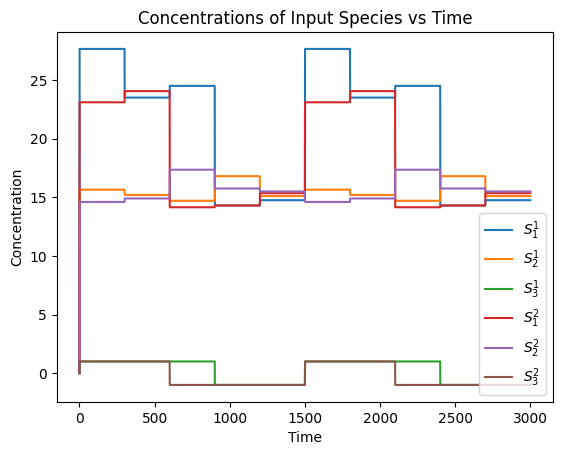

In [51]:
# plotting the figures
plt.plot(s_1_1_net, label=r"$S^{1}_{1}$")
plt.plot(s_1_2_net, label= r"$S^{1}_{2}$")
plt.plot(s_1_3_net, label=r"$S^{1}_{3}$")
plt.plot(s_2_1_net, label=r"$S^{2}_{1}$")
plt.plot(s_2_2_net, label=r"$S^{2}_{2}$")
plt.plot(s_2_3_net, label=r"$S^{2}_{3}$")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentrations of Input Species vs Time')
plt.show()

In [44]:
print(f"S{}")


SyntaxError: f-string: invalid syntax (2687940518.py, line 1)